In [1]:
from pybatteryid import ModelStructure
from pybatteryid.model import save_to_file, print_model_details
from pybatteryid.plotter import plot_time_vs_current

from data import helper

### Example 1 - Model Identification for an NMC Battery

This file contains an example to identify battery models for a 1 Ah NMC battery. See [X] for more details.

#### A. Initialize model structure

In [2]:
# The LFP battery being modelled has the capacity around
# 1 Ah. The exact value has been calculated by coulomb-counting
# during GITT experiment.
battery_capacity = 3440.05372
# The experimental measurements were recorded with 1s
# sampling period.
sampling_period = 1

model_structure = ModelStructure(battery_capacity=battery_capacity, sampling_period=sampling_period)

#### B. Load EMF and Hysteresis data

In [3]:
#
emf_data = helper.load_npy_data('data/nmc/gitt_data.npy')
model_structure.add_emf_function(emf_data['soc_values'], emf_data['voltage_values'])

#### C. Add Basis Functions

In [4]:
model_structure.add_basis_functions(
    [ 's⁻¹', 'log[s]', 's', 'exp[0.05sqrt[|i|]]', 'd[0.01,0.99]' ]
)

#### D. Identify a battery model

We identify a battery model for given model order $n$ and nonlinearity order $l$.

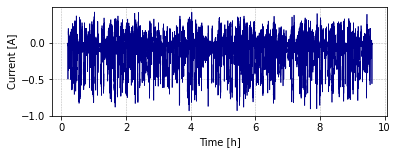

In [5]:
# 
dataset = helper.load_npy_data(f'data/nmc/identification_data.npy')
#
plot_time_vs_current([(dataset['time'] / 3600, dataset['current'])],
                     units=('h', 'A'), colors=['darkblue'])

In [6]:
model = model_structure.identify(
    dataset, initial_soc=0.982677, model_order=1, nonlinearity_order=1, optimizers=['lasso', 'ridge']
)

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Performing LASSO using `l1regls.py` from cvxopt.org. See the following link for details:                        │
│ https://cvxopt.org/examples/mlbook/l1regls.html                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

     pcost       dcost       gap    pres   dres
 0: -6.8281e+02 -6.7303e+02  2e+01  1e+01  5e-11
 1: -6.7332e+02 -6.7287e+02  1e+00  5e-01  2e-12
 2: -6.7259e+02 -6.7260e+02  2e-01  7e-02  3e-13
 3: -6.7256e+02 -6.7257e+02  3e-02  6e-03  2e-14
 4: -6.7256e+02 -6.7256e+02  4e-03  4e-04  6e-14
 5: -6.7256e+02 -6.7256e+02  1e-04  7e-06  2e-13
 6: -6.7256e+02 -6.7256e+02  1e-06  7e-08  5e-13
Optimal solution found.


╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Performing cross-validated Ridge regression using `sklearn` package.                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Solution found using alpha = 0.1

#### E. Print Model Details

In [7]:
#
print_model_details(model)

          Model order = 1; Nonlinearity order = 1          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Model Term                     ┃ Estimated Parameter    ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ v(k-1)                         │ 0.9771521386390055     │
│ v(k-1)*s⁻¹(k-1)                │ 0.0009421105618847712  │
│ v(k-1)*d[0.01,0.99](k-1)       │ 0.009218289665227567   │
│ i(k)*s⁻¹(k)                    │ -0.0007001489755486966 │
│ i(k)*log[s](k)                 │ -0.030345678420494866  │
│ i(k)*exp[0.05sqrt[|i|]](k)     │ 0.13707038489922213    │
│ i(k)*d[0.01,0.99](k)           │ 0.0008461807016183218  │
│ i(k-1)*s⁻¹(k-1)                │ 0.003575461839317096   │
│ i(k-1)*log[s](k-1)             │ 0.03605434468949869    │
│ i(k-1)*exp[0.05sqrt[|i|]](k-1) │ -0.12813728292654433   │
│ i(k-1)*d[0.01,0.99](k-1)       │ -0.003840280608001204  │
└────────────────────────────────┴────────────────────────┘

#### F. Save Model to File

In [9]:
save_to_file(model, 'results/nmc', 'model')